<a href="https://colab.research.google.com/github/MuhammadIrzam447/MultiModel/blob/master/Valid_37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import os
from PIL import Image
import torch
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
import torchvision
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import UnidentifiedImageError
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Loading Validation Dataset and Preprocessing

In [ ]:
# save_dir = '/content/Model/Fused_ResNetmodel_Hatefull_Experiment#5'
# load_path = os.path.join(save_dir, 'model.pth')

# # Create an instance of the ResNet model
# resnet = torchvision.models.resnet101(pretrained=False)
# resnet.fc = nn.Linear(2048, 2) # Choose the number of output classses as per your model

# # Load the saved model parameters
# # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
# resnet.load_state_dict(torch.load(load_path))

# # Set the model to evaluation mode and respective device
# resnet.eval()
# resnet.to(device)

In [3]:
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
class ValidationDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.dataset = datasets.ImageFolder(data_dir, transform=val_transform)
        self.classes = sorted(os.listdir(data_dir))
        self.class_lengths = self._compute_class_lengths()

    def _compute_class_lengths(self):
        class_lengths = {cls: 0 for cls in self.classes}

        for cls in self.classes:
            cls_dir = os.path.join(self.data_dir, cls)
            if os.path.isdir(cls_dir):
                class_lengths[cls] = len(os.listdir(cls_dir))

        return class_lengths

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, label

    def __len__(self):
        return len(self.dataset)

In [5]:
valPath = "/content/Dataset(s)/fused-food-101-test"
val_dataset = ValidationDataset(valPath)

In [6]:
batch_size = 32
validation_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [7]:
print("Number of samples:", len(val_dataset))
print("Number of classes:", len(val_dataset.classes))

Number of samples: 22716
Number of classes: 101


In [8]:
num_batches = len(validation_data_loader)
print("Number of batches:", num_batches)

Number of batches: 710


# Validation

In [10]:
epoch = 1
save_dir = '/content/Model/Models-Train-09'
while epoch < 23:
    model_name = str(epoch+1) + "_model.pth"
    load_path = os.path.join(save_dir, model_name)

    # Create an instance of the ResNet model
    resnet = torchvision.models.resnet101(pretrained=False)
    resnet.fc = nn.Linear(2048, 101) # Choose the number of output classses as per your model

    # Load the saved model parameters
    # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
    resnet.load_state_dict(torch.load(load_path))

    # Set the model to evaluation mode and respective device
    resnet.eval()
    resnet.to(device)

    # resnet.eval()

    predicted_classes = []
    actual_labels = []

    with torch.no_grad():
        for images, labels in validation_data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = resnet(images)

            # Get the predicted labels
            _, predicted_label = torch.max(outputs, 1)

            # Store the predicted and true labels
            predicted_classes.extend(predicted_label.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

        accuracy = accuracy_score(actual_labels, predicted_classes)
        precision = precision_score(actual_labels, predicted_classes, average='weighted')
        recall = recall_score(actual_labels, predicted_classes, average='weighted')
        f1 = f1_score(actual_labels, predicted_classes, average='weighted')

        print("Result with model " + model_name + " : ")
        print("=========================================")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print(classification_report(actual_labels, predicted_classes))

        predicted_classes = np.array(predicted_classes)
        actual_labels = np.array(actual_labels)

        # Calculate the AUROC score
        # auroc = roc_auc_score(actual_labels, predicted_classes)
        # print("AUROC:", auroc)
        epoch = epoch + 1


Result with model 2_model.pth : 
Accuracy: 0.9041644655749251
Precision: 0.9060352882767518
Recall: 0.9041644655749251
F1-score: 0.9040863897495567
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       234
           1       0.95      0.95      0.95       221
           2       0.95      0.92      0.94       226
           3       0.87      0.87      0.87       222
           4       0.66      0.68      0.67       225
           5       0.91      0.96      0.93       224
           6       0.94      0.91      0.92       224
           7       0.91      0.91      0.91       225
           8       0.92      0.97      0.95       226
           9       0.83      0.90      0.87       214
          10       0.96      0.94      0.95       231
          11       0.93      0.93      0.93       227
          12       0.85      0.94      0.89       230
          13       0.90      0.96      0.93       220
          14       0.96      0.89      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 3_model.pth : 
Accuracy: 0.9006867406233492
Precision: 0.9025046550306296
Recall: 0.9006867406233492
F1-score: 0.9007311546392337
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       234
           1       0.95      0.92      0.94       221
           2       0.95      0.95      0.95       226
           3       0.84      0.86      0.85       222
           4       0.54      0.76      0.63       225
           5       0.93      0.90      0.91       224
           6       0.88      0.92      0.90       224
           7       0.96      0.91      0.93       225
           8       0.94      0.97      0.95       226
           9       0.84      0.88      0.86       214
          10       0.88      0.94      0.91       231
          11       0.89      0.95      0.92       227
          12       0.92      0.93      0.93       230
          13       0.88      0.98      0.92       220
          14       0.94      0.91      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 4_model.pth : 
Accuracy: 0.9034160943828139
Precision: 0.9053169020802835
Recall: 0.9034160943828139
F1-score: 0.903415769490016
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       234
           1       0.95      0.95      0.95       221
           2       0.99      0.93      0.96       226
           3       0.83      0.90      0.86       222
           4       0.68      0.73      0.71       225
           5       0.98      0.91      0.94       224
           6       0.90      0.92      0.91       224
           7       0.97      0.90      0.93       225
           8       0.92      0.97      0.94       226
           9       0.87      0.86      0.86       214
          10       0.94      0.94      0.94       231
          11       0.95      0.92      0.93       227
          12       0.90      0.94      0.92       230
          13       0.95      0.93      0.94       220
          14       0.96      0.85      0.9

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 5_model.pth : 
Accuracy: 0.9057052297939778
Precision: 0.9064766127017091
Recall: 0.9057052297939778
F1-score: 0.9053522609682403
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       234
           1       0.92      0.96      0.94       221
           2       0.97      0.94      0.95       226
           3       0.75      0.88      0.81       222
           4       0.74      0.68      0.71       225
           5       0.89      0.95      0.92       224
           6       0.93      0.90      0.91       224
           7       0.94      0.92      0.93       225
           8       0.95      0.97      0.96       226
           9       0.85      0.87      0.86       214
          10       0.96      0.94      0.95       231
          11       0.92      0.93      0.93       227
          12       0.91      0.94      0.93       230
          13       0.89      0.96      0.93       220
          14       0.97      0.87      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 6_model.pth : 
Accuracy: 0.903504138052474
Precision: 0.9045584888317365
Recall: 0.903504138052474
F1-score: 0.9031201870835338
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       234
           1       0.96      0.94      0.95       221
           2       0.96      0.95      0.96       226
           3       0.74      0.85      0.79       222
           4       0.75      0.64      0.69       225
           5       0.96      0.94      0.95       224
           6       0.91      0.93      0.92       224
           7       0.97      0.90      0.93       225
           8       0.86      0.99      0.92       226
           9       0.88      0.86      0.87       214
          10       0.94      0.94      0.94       231
          11       0.85      0.96      0.90       227
          12       0.94      0.89      0.92       230
          13       0.96      0.95      0.95       220
          14       0.94      0.88      0.91

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 7_model.pth : 
Accuracy: 0.9048247930973763
Precision: 0.9060435088073444
Recall: 0.9048247930973763
F1-score: 0.9046924479274621
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       234
           1       0.93      0.95      0.94       221
           2       0.96      0.95      0.96       226
           3       0.82      0.87      0.84       222
           4       0.69      0.71      0.70       225
           5       0.93      0.92      0.92       224
           6       0.95      0.90      0.92       224
           7       0.95      0.90      0.93       225
           8       0.93      0.98      0.96       226
           9       0.93      0.85      0.89       214
          10       0.92      0.96      0.94       231
          11       0.92      0.95      0.94       227
          12       0.92      0.94      0.93       230
          13       0.98      0.96      0.97       220
          14       0.95      0.88      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 8_model.pth : 
Accuracy: 0.9034160943828139
Precision: 0.9039180555650105
Recall: 0.9034160943828139
F1-score: 0.9029194806090833
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       234
           1       0.93      0.92      0.93       221
           2       0.96      0.96      0.96       226
           3       0.83      0.84      0.84       222
           4       0.80      0.67      0.73       225
           5       0.94      0.92      0.93       224
           6       0.91      0.91      0.91       224
           7       0.93      0.92      0.92       225
           8       0.90      0.98      0.94       226
           9       0.87      0.86      0.87       214
          10       0.91      0.93      0.92       231
          11       0.88      0.94      0.91       227
          12       0.95      0.93      0.94       230
          13       0.89      0.97      0.93       220
          14       0.96      0.90      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 9_model.pth : 
Accuracy: 0.9054851206198274
Precision: 0.9070003129150067
Recall: 0.9054851206198274
F1-score: 0.9053653587023497
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       234
           1       0.91      0.94      0.92       221
           2       0.92      0.97      0.94       226
           3       0.86      0.84      0.85       222
           4       0.81      0.71      0.76       225
           5       0.95      0.94      0.94       224
           6       0.87      0.92      0.90       224
           7       0.94      0.91      0.92       225
           8       0.91      0.97      0.94       226
           9       0.93      0.86      0.89       214
          10       0.92      0.96      0.94       231
          11       0.94      0.93      0.93       227
          12       0.90      0.94      0.92       230
          13       0.97      0.96      0.96       220
          14       0.96      0.89      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 10_model.pth : 
Accuracy: 0.9042525092445853
Precision: 0.9057061590043183
Recall: 0.9042525092445853
F1-score: 0.9041536725302479
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       234
           1       0.94      0.96      0.95       221
           2       0.95      0.96      0.95       226
           3       0.93      0.85      0.89       222
           4       0.79      0.63      0.70       225
           5       0.95      0.94      0.94       224
           6       0.92      0.92      0.92       224
           7       0.88      0.91      0.89       225
           8       0.97      0.98      0.97       226
           9       0.88      0.87      0.88       214
          10       0.96      0.95      0.95       231
          11       0.95      0.93      0.94       227
          12       0.87      0.93      0.90       230
          13       0.95      0.95      0.95       220
          14       0.94      0.88      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 11_model.pth : 
Accuracy: 0.9042965310794154
Precision: 0.9065176627415054
Recall: 0.9042965310794154
F1-score: 0.904434960327757
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       234
           1       0.97      0.90      0.94       221
           2       0.95      0.95      0.95       226
           3       0.84      0.85      0.85       222
           4       0.68      0.68      0.68       225
           5       0.96      0.92      0.94       224
           6       0.94      0.87      0.90       224
           7       0.92      0.91      0.91       225
           8       0.94      0.97      0.96       226
           9       0.91      0.84      0.87       214
          10       0.93      0.94      0.94       231
          11       0.96      0.94      0.95       227
          12       0.95      0.93      0.94       230
          13       0.98      0.96      0.97       220
          14       0.92      0.90      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 12_model.pth : 
Accuracy: 0.9031959852086635
Precision: 0.9040048013137826
Recall: 0.9031959852086635
F1-score: 0.9029061539993333
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       234
           1       0.94      0.93      0.94       221
           2       0.95      0.95      0.95       226
           3       0.82      0.86      0.84       222
           4       0.78      0.69      0.73       225
           5       0.90      0.95      0.92       224
           6       0.94      0.87      0.90       224
           7       0.97      0.88      0.92       225
           8       0.92      0.98      0.95       226
           9       0.92      0.86      0.89       214
          10       0.90      0.96      0.93       231
          11       0.85      0.96      0.90       227
          12       0.91      0.93      0.92       230
          13       0.91      0.96      0.94       220
          14       0.96      0.90      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 13_model.pth : 
Accuracy: 0.9031959852086635
Precision: 0.9040178800440267
Recall: 0.9031959852086635
F1-score: 0.9028109149709564
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       234
           1       0.96      0.94      0.95       221
           2       0.92      0.97      0.95       226
           3       0.82      0.85      0.84       222
           4       0.72      0.70      0.71       225
           5       0.99      0.89      0.93       224
           6       0.92      0.92      0.92       224
           7       0.97      0.88      0.92       225
           8       0.91      0.98      0.94       226
           9       0.91      0.86      0.88       214
          10       0.92      0.94      0.93       231
          11       0.96      0.91      0.93       227
          12       0.96      0.94      0.95       230
          13       0.93      0.96      0.94       220
          14       0.95      0.88      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 14_model.pth : 
Accuracy: 0.9029758760345131
Precision: 0.90426199489665
Recall: 0.9029758760345131
F1-score: 0.902755822142798
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       234
           1       0.93      0.95      0.94       221
           2       0.93      0.96      0.95       226
           3       0.79      0.87      0.83       222
           4       0.73      0.64      0.68       225
           5       0.92      0.94      0.93       224
           6       0.94      0.91      0.92       224
           7       0.96      0.91      0.93       225
           8       0.85      0.99      0.92       226
           9       0.87      0.86      0.86       214
          10       0.96      0.94      0.95       231
          11       0.95      0.92      0.93       227
          12       0.89      0.95      0.92       230
          13       0.88      0.97      0.92       220
          14       0.96      0.88      0.92

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 15_model.pth : 
Accuracy: 0.9029758760345131
Precision: 0.9035379654701503
Recall: 0.9029758760345131
F1-score: 0.9026315019834505
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       234
           1       0.91      0.96      0.94       221
           2       0.89      0.97      0.93       226
           3       0.81      0.84      0.83       222
           4       0.64      0.70      0.67       225
           5       0.98      0.90      0.93       224
           6       0.94      0.90      0.92       224
           7       0.96      0.87      0.91       225
           8       0.92      0.97      0.94       226
           9       0.86      0.83      0.84       214
          10       0.92      0.96      0.94       231
          11       0.93      0.94      0.94       227
          12       0.89      0.94      0.92       230
          13       0.93      0.95      0.94       220
          14       0.94      0.89      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 16_model.pth : 
Accuracy: 0.902315548512062
Precision: 0.902576816094225
Recall: 0.902315548512062
F1-score: 0.9017668719193072
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       234
           1       0.94      0.94      0.94       221
           2       0.95      0.96      0.95       226
           3       0.91      0.82      0.86       222
           4       0.70      0.73      0.72       225
           5       0.91      0.95      0.93       224
           6       0.90      0.91      0.91       224
           7       0.91      0.92      0.91       225
           8       0.87      0.98      0.92       226
           9       0.85      0.83      0.84       214
          10       0.91      0.95      0.93       231
          11       0.91      0.95      0.93       227
          12       0.94      0.94      0.94       230
          13       0.96      0.97      0.96       220
          14       0.95      0.90      0.92

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 17_model.pth : 
Accuracy: 0.9059253389681282
Precision: 0.9060032122680031
Recall: 0.9059253389681282
F1-score: 0.9052262547364662
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       234
           1       0.95      0.95      0.95       221
           2       0.94      0.96      0.95       226
           3       0.79      0.88      0.84       222
           4       0.79      0.65      0.71       225
           5       0.97      0.90      0.93       224
           6       0.92      0.90      0.91       224
           7       0.95      0.92      0.93       225
           8       0.93      0.97      0.95       226
           9       0.91      0.85      0.88       214
          10       0.89      0.95      0.92       231
          11       0.90      0.95      0.92       227
          12       0.94      0.94      0.94       230
          13       0.89      0.96      0.93       220
          14       0.96      0.90      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 18_model.pth : 
Accuracy: 0.9060133826377883
Precision: 0.9070805468864405
Recall: 0.9060133826377883
F1-score: 0.9056532024898175
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       234
           1       0.96      0.95      0.96       221
           2       0.93      0.95      0.94       226
           3       0.78      0.90      0.83       222
           4       0.82      0.65      0.72       225
           5       0.95      0.93      0.94       224
           6       0.91      0.91      0.91       224
           7       0.97      0.88      0.92       225
           8       0.94      0.98      0.96       226
           9       0.90      0.86      0.88       214
          10       0.91      0.94      0.93       231
          11       0.91      0.95      0.93       227
          12       0.93      0.93      0.93       230
          13       0.92      0.97      0.95       220
          14       0.96      0.87      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 19_model.pth : 
Accuracy: 0.9015231554851206
Precision: 0.9027802888760094
Recall: 0.9015231554851206
F1-score: 0.9012929472008119
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       234
           1       0.94      0.95      0.94       221
           2       0.95      0.96      0.95       226
           3       0.80      0.87      0.84       222
           4       0.70      0.67      0.68       225
           5       0.96      0.90      0.93       224
           6       0.96      0.88      0.92       224
           7       0.93      0.90      0.92       225
           8       0.90      0.98      0.94       226
           9       0.84      0.86      0.85       214
          10       0.88      0.97      0.92       231
          11       0.93      0.94      0.94       227
          12       0.96      0.93      0.94       230
          13       0.92      0.95      0.94       220
          14       0.95      0.89      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 20_model.pth : 
Accuracy: 0.9054851206198274
Precision: 0.9058524838898645
Recall: 0.9054851206198274
F1-score: 0.904938015150714
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       234
           1       0.95      0.95      0.95       221
           2       0.91      0.96      0.94       226
           3       0.84      0.87      0.85       222
           4       0.73      0.68      0.70       225
           5       0.97      0.89      0.93       224
           6       0.93      0.92      0.92       224
           7       0.91      0.92      0.91       225
           8       0.91      0.97      0.94       226
           9       0.91      0.86      0.89       214
          10       0.89      0.95      0.92       231
          11       0.95      0.93      0.94       227
          12       0.94      0.94      0.94       230
          13       0.93      0.97      0.95       220
          14       0.94      0.87      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 21_model.pth : 
Accuracy: 0.907554146856841
Precision: 0.90827944741478
Recall: 0.907554146856841
F1-score: 0.9071458714431025
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       234
           1       0.98      0.94      0.96       221
           2       0.96      0.96      0.96       226
           3       0.84      0.83      0.84       222
           4       0.69      0.72      0.70       225
           5       0.96      0.95      0.95       224
           6       0.91      0.92      0.92       224
           7       0.92      0.90      0.91       225
           8       0.90      0.98      0.94       226
           9       0.91      0.85      0.88       214
          10       0.94      0.96      0.95       231
          11       0.94      0.93      0.93       227
          12       0.90      0.94      0.92       230
          13       0.92      0.96      0.94       220
          14       0.93      0.91      0.92 

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 22_model.pth : 
Accuracy: 0.9096231730938545
Precision: 0.9099850906103987
Recall: 0.9096231730938545
F1-score: 0.9089845011563239
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       234
           1       0.96      0.94      0.95       221
           2       0.94      0.96      0.95       226
           3       0.83      0.86      0.85       222
           4       0.77      0.72      0.74       225
           5       0.93      0.93      0.93       224
           6       0.93      0.90      0.91       224
           7       0.92      0.91      0.92       225
           8       0.94      0.98      0.96       226
           9       0.90      0.88      0.89       214
          10       0.92      0.96      0.94       231
          11       0.89      0.96      0.92       227
          12       0.93      0.94      0.94       230
          13       0.93      0.95      0.94       220
          14       0.93      0.90      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 23_model.pth : 
Accuracy: 0.9097992604331748
Precision: 0.9099252252513411
Recall: 0.9097992604331748
F1-score: 0.9092049512018134
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       234
           1       0.93      0.95      0.94       221
           2       0.96      0.96      0.96       226
           3       0.81      0.87      0.84       222
           4       0.78      0.67      0.72       225
           5       0.88      0.95      0.91       224
           6       0.92      0.93      0.92       224
           7       0.91      0.91      0.91       225
           8       0.91      0.98      0.94       226
           9       0.89      0.88      0.88       214
          10       0.93      0.95      0.94       231
          11       0.93      0.95      0.94       227
          12       0.91      0.95      0.93       230
          13       0.94      0.95      0.95       220
          14       0.96      0.88      0

In [ ]:
accuracy = accuracy_score(actual_labels, predicted_classes)
precision = precision_score(actual_labels, predicted_classes, average='weighted')
recall = recall_score(actual_labels, predicted_classes, average='weighted')
f1 = f1_score(actual_labels, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9307009922721661
Precision: 0.9306456934135363
Recall: 0.9307009922721661
F1-score: 0.9301657370600408


In [ ]:
print(classification_report(actual_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.73      0.53      0.61       118
           1       0.97      0.96      0.96      3758
           2       0.97      0.95      0.96       690
           3       0.94      0.99      0.96        96
           4       0.95      0.97      0.96       264
           5       0.87      0.86      0.87       352
           6       0.96      0.98      0.97      2138
           7       0.93      0.94      0.93       296
           8       0.95      0.98      0.97      1326
           9       0.97      0.99      0.98      1284
          10       0.88      0.93      0.91       272
          11       0.88      0.84      0.86        70
          12       0.83      0.88      0.86       224
          13       0.94      0.94      0.94      1684
          14       0.94      0.98      0.96      3110
          15       0.63      0.71      0.67        72
          16       0.93      0.81      0.87       102
          17       0.96    

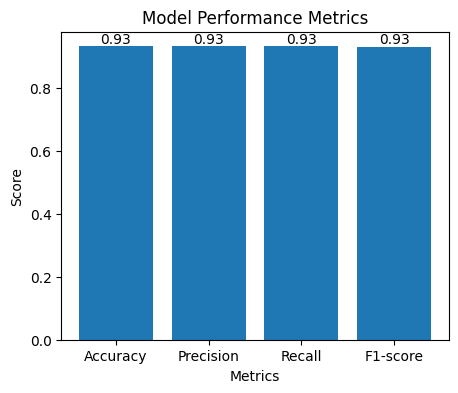

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(x, values)

# labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# scores on top of each bar
for i, bar in enumerate(bars):
    score = values[i]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()

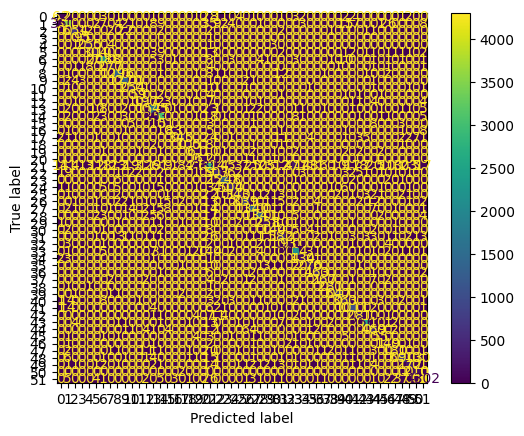

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels, predicted_classes)
ConfusionMatrixDisplay(cm).plot()

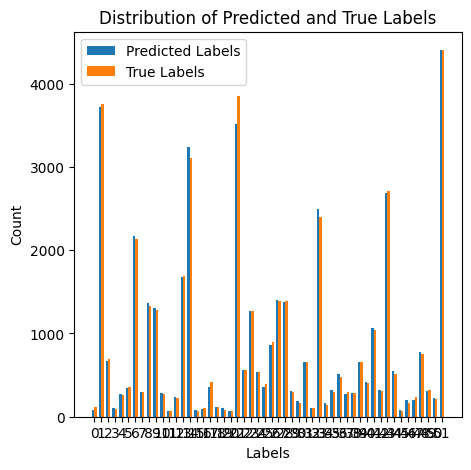

In [ ]:
# Count the occurrences of each label in predicted and true labels
predicted_counts = np.bincount(predicted_classes)
true_counts = np.bincount(actual_labels)

# Get the unique labels
labels = np.unique(np.concatenate((predicted_classes, actual_labels)))

# Set the x-axis range
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35

# Plot the predicted and true label counts
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x - width/2, predicted_counts, width, label='Predicted Labels')
ax.bar(x + width/2, true_counts, width, label='True Labels')

# Add labels, title, and legend
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Predicted and True Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()